# importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import data

In [2]:
train = pd.read_csv("/content/KDDTrain+.txt")
test = pd.read_csv("/content/KDDTest+.txt")

In [3]:
train.shape #check dimensions

(55295, 43)

In [4]:
test.shape #check dimensions

(22543, 43)

In [5]:
train.info() # check information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55295 entries, 0 to 55294
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         55295 non-null  int64  
 1   tcp       55295 non-null  object 
 2   ftp_data  55295 non-null  object 
 3   SF        55295 non-null  object 
 4   491       55295 non-null  int64  
 5   0.1       55295 non-null  int64  
 6   0.2       55295 non-null  int64  
 7   0.3       55295 non-null  int64  
 8   0.4       55295 non-null  int64  
 9   0.5       55295 non-null  int64  
 10  0.6       55295 non-null  int64  
 11  0.7       55295 non-null  int64  
 12  0.8       55295 non-null  int64  
 13  0.9       55295 non-null  int64  
 14  0.10      55295 non-null  int64  
 15  0.11      55295 non-null  int64  
 16  0.12      55295 non-null  int64  
 17  0.13      55295 non-null  int64  
 18  0.14      55295 non-null  int64  
 19  0.15      55295 non-null  int64  
 20  0.16      55295 non-null  in

In [6]:
test.info() # check information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        22543 non-null  int64  
 1   tcp      22543 non-null  object 
 2   private  22543 non-null  object 
 3   REJ      22543 non-null  object 
 4   0.1      22543 non-null  int64  
 5   0.2      22543 non-null  int64  
 6   0.3      22543 non-null  int64  
 7   0.4      22543 non-null  int64  
 8   0.5      22543 non-null  int64  
 9   0.6      22543 non-null  int64  
 10  0.7      22543 non-null  int64  
 11  0.8      22543 non-null  int64  
 12  0.9      22543 non-null  int64  
 13  0.10     22543 non-null  int64  
 14  0.11     22543 non-null  int64  
 15  0.12     22543 non-null  int64  
 16  0.13     22543 non-null  int64  
 17  0.14     22543 non-null  int64  
 18  0.15     22543 non-null  int64  
 19  0.16     22543 non-null  int64  
 20  0.17     22543 non-null  int64  
 21  0.18     225

In [7]:
train.head(5)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0


In [8]:
test.head(5)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [9]:
labels = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack_type','outcome']

In [10]:
train.columns = labels
test.columns = labels

In [11]:
data = pd.concat([train, test])

In [12]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,outcome
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21.0
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21.0
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15.0
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0


In [13]:
data['attack_check'] = np.where(data['attack_type']!= 'normal', True, False)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,outcome,attack_check
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15.0,False
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19.0,True
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21.0,False
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0,False
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21.0,False
22539,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21.0,False
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15.0,True
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0,False


In [14]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,outcome,attack_check
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15.0,False
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0,True
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0,False
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0,False
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0,True


In [15]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                1
same_srv_rate                  1
diff_srv_rate                  1
srv_diff_h

In [16]:
data['attack_check'].unique()

array([False,  True])

In [17]:
data.dropna(inplace = True)

# EDA

<Axes: xlabel='attack_check', ylabel='count'>

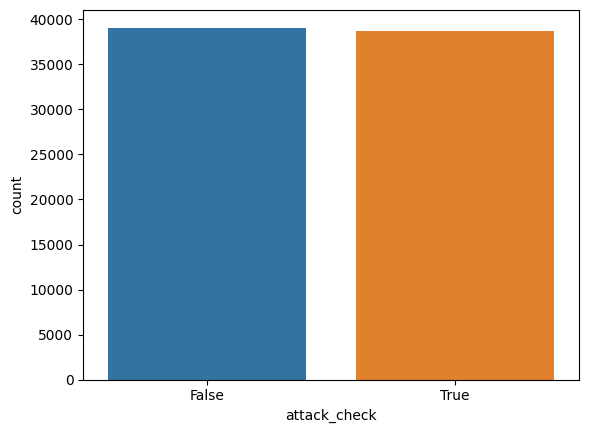

In [18]:
sns.countplot(x=data["attack_check"])

<Axes: ylabel='attack_check'>

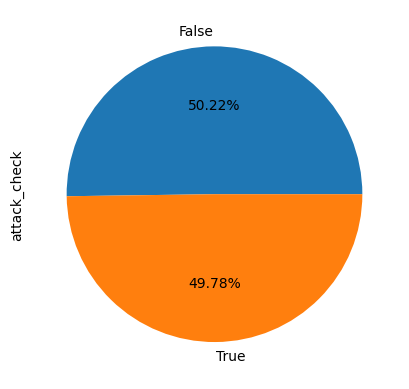

In [19]:
round(data["attack_check"].value_counts()/data.shape[0]*100,2).plot.pie(autopct="%1.2f%%")

In [20]:
data["protocol_type"].value_counts()

tcp     63974
udp      9209
icmp     4654
Name: protocol_type, dtype: int64

<Axes: xlabel='protocol_type', ylabel='count'>

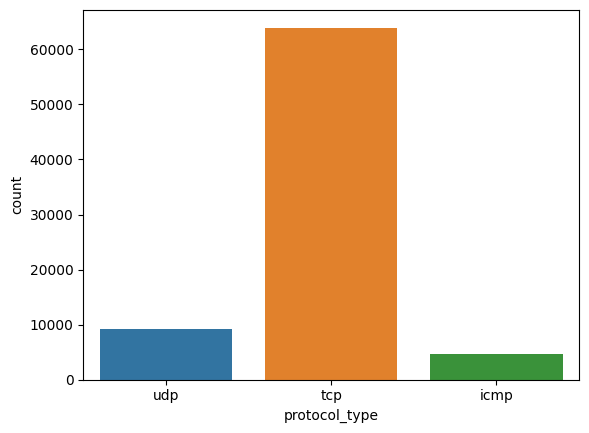

In [21]:
sns.countplot(x=data["protocol_type"])

<Axes: ylabel='protocol_type'>

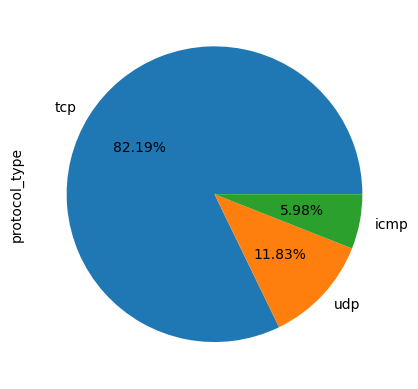

In [22]:
round(data["protocol_type"].value_counts()/data.shape[0]*100,2).plot.pie(autopct="%1.2f%%")

In [23]:
data["logged_in"].value_counts()

0    46099
1    31738
Name: logged_in, dtype: int64

<Axes: xlabel='logged_in', ylabel='count'>

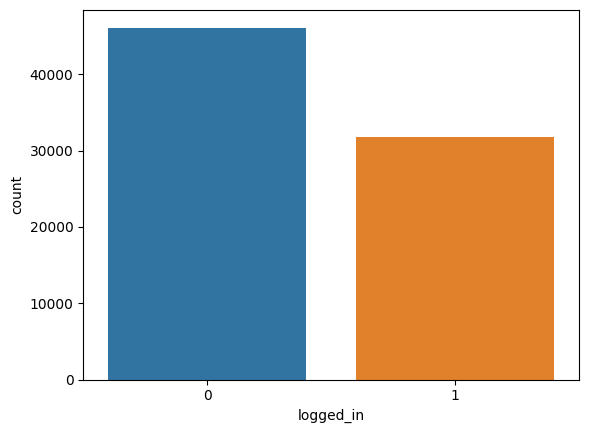

In [24]:
sns.countplot(x=data["logged_in"])

In [25]:
data["flag"].value_counts()

SF        47615
S0        17472
REJ        8750
RSTR       1774
RSTO       1430
S3          280
S1          194
SH          173
S2           78
RSTOS0       51
OTH          20
Name: flag, dtype: int64

<Axes: xlabel='count', ylabel='flag'>

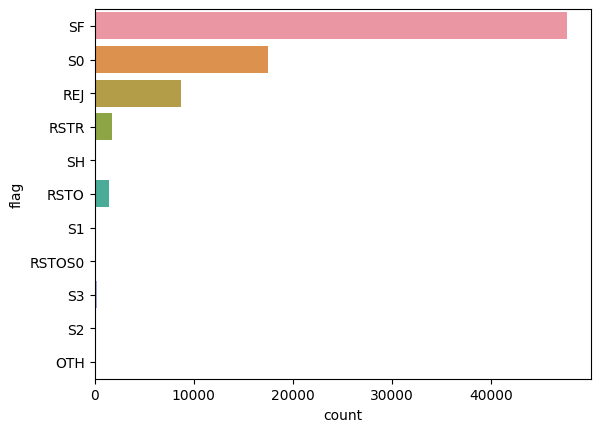

In [26]:
sns.countplot(data=data, y="flag")

In [27]:
data["urgent"].value_counts()

0    77825
1        6
2        4
3        2
Name: urgent, dtype: int64

<Axes: xlabel='urgent', ylabel='count'>

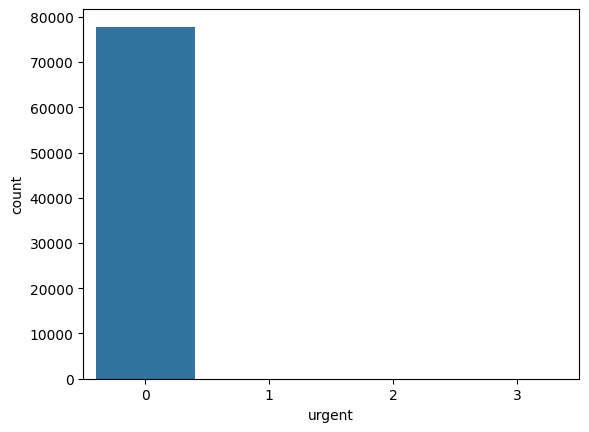

In [28]:
sns.countplot(x=data["urgent"])

 # Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
for i in data.columns:
    if (data[i].dtypes== 'object') :
        data[i] = le.fit_transform(data[i])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77837 entries, 0 to 22542
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     77837 non-null  int64  
 1   protocol_type                77837 non-null  int64  
 2   service                      77837 non-null  int64  
 3   flag                         77837 non-null  int64  
 4   src_bytes                    77837 non-null  int64  
 5   dst_bytes                    77837 non-null  int64  
 6   land                         77837 non-null  int64  
 7   wrong_fragment               77837 non-null  int64  
 8   urgent                       77837 non-null  int64  
 9   hot                          77837 non-null  int64  
 10  num_failed_logins            77837 non-null  int64  
 11  logged_in                    77837 non-null  int64  
 12  num_compromised              77837 non-null  int64  
 13  root_shell      

In [33]:
X = data.drop('attack_check', axis = 1)
Y = data['attack_check'].values

# Splitting the data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52150, 43) (25687, 43) (52150,) (25687,)


# Classification with Support-vector machine

In [35]:
from sklearn.svm import SVC

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
rbf_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=15, C=0.1)) # [gamma = 10 ,c=0.01] | [gamma = 15, c=0.1 ---> best paramenters]
 ])

In [39]:
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.1, gamma=15))])

In [40]:
#polynomial_svm_clf.score(trainM)
rbf_kernel_svm_clf.score(X_train,y_train)

0.9092233940556088

In [41]:
rbf_kernel_svm_clf.score(X_test,y_test)

0.8876085179273563

In [42]:
y_pred =rbf_kernel_svm_clf.predict(X_test)

In [43]:
pd.DataFrame(y_pred,columns=['y_pred'])

,y_pred
0,False
1,False
2,False
3,True
4,False
...,...
25682,True
25683,True
25684,True
25685,False


In [44]:
pd.DataFrame(y_test,columns=['y_test'])

,y_test
0,False
1,False
2,False
3,True
4,False
...,...
25682,True
25683,False
25684,True
25685,False


# Evaluation

In [45]:
from sklearn import metrics

In [46]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [47]:
cm

array([[10072,  2887],
       [    0, 12728]])

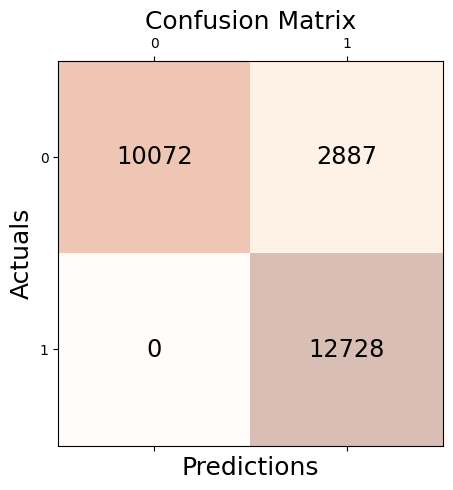

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [49]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.8876085179273563

In [50]:
recall = metrics.recall_score(y_test,y_pred)
recall

1.0

In [51]:
precision = metrics.precision_score(y_test,y_pred)
precision

0.8151136727505603

In [52]:
f1score = metrics.f1_score(y_test,y_pred)
f1score

0.8981406343718026

In [53]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

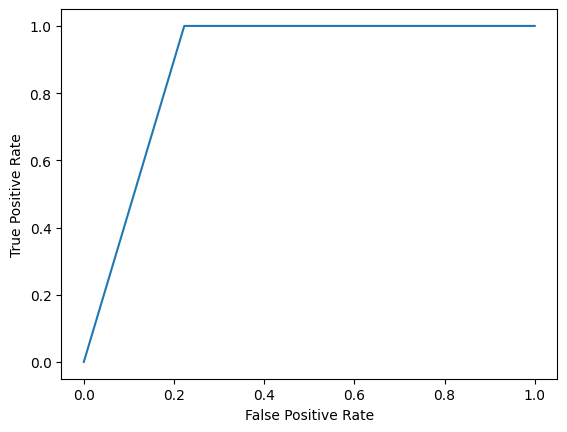

In [54]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

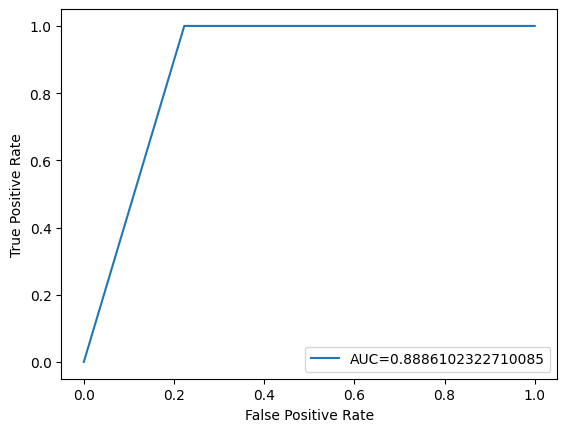

In [55]:
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()